In [39]:
#Credit Card Fraud Detection – KNN Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
#Load dataset
df = pd.read_csv("creditcard.csv")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df["Class"].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [42]:
#Split X & y
X = df.drop("Class", axis=1)
y = df["Class"]

In [43]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
#Fix Imbalance using SMOTE (oversampling rare fraud cases)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE oversampling:")
print(y_train.value_counts())


After SMOTE oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64


In [45]:
#Scale features (critical for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
#Train KNN Model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
#Predictions
y_pred = model.predict(X_test)

In [48]:
#Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation (KNN – Fraud Detection):")
print("Accuracy:", acc)      
print("Precision:", prec)
print("Recall:", rec)         
print("F1 Score:", f1)


Model Evaluation (KNN – Fraud Detection):
Accuracy: 0.9980688880306169
Precision: 0.4659090909090909
Recall: 0.8367346938775511
F1 Score: 0.5985401459854015


In [49]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[56770    94]
 [   16    82]]


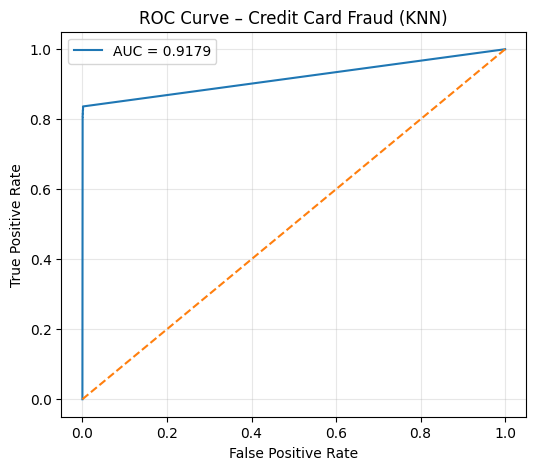

In [56]:
#ROC Curve + AUC
# KNN does NOT support predict_proba unless weights='distance'
model_prob = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_prob.fit(X_train, y_train)
y_prob = model_prob.predict_proba(X_test)[:, 1]

fpr, tpr, thr = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Credit Card Fraud (KNN)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [58]:
#Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Avg Accuracy:", cv_scores.mean(), "| Scores:", cv_scores)


Cross-Validation Avg Accuracy: 0.451985362546602 | Scores: [0.0304589  0.27836101 0.53468162 0.41814575 0.99827952]
